In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_excel('realestatedataset.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


In [3]:
Y=df['Y house price of unit area']
X=df['X3 distance to the nearest MRT station']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [4]:
s=StandardScaler()
Xs_train=s.fit_transform(pd.DataFrame(X_train))
Xs_test=s.fit_transform(pd.DataFrame(X_test))
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

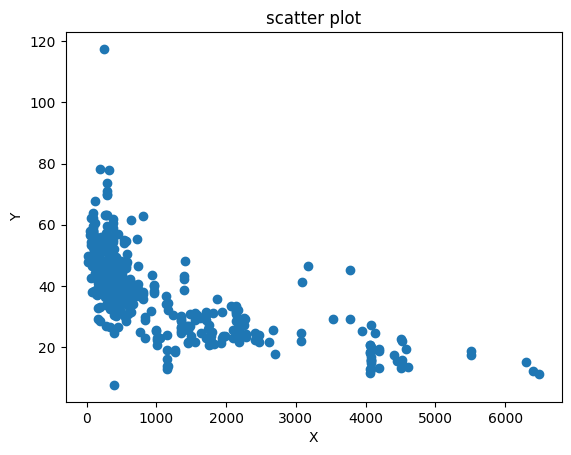

In [5]:
plt.scatter(X,Y)
plt.title("scatter plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [7]:
theta=np.array([1.2,1.1])
n_iter=100
lr=0.1
for i in range(n_iter):
    mse=0
    e=0
    ue=0
    tl=len(Xs_train)
    for j in range(0,tl):
        y=theta[0]+theta[1]*Xs_train[j]
        e=e+Y_train[j]-y
        ue=ue+(Y_train[j]-y)*Xs_train[j]
        mse=mse+(Y_train[j]-y)**2
    e=e/tl
    ue=ue/tl
    mse=mse/tl
    theta[0]=theta[0]+lr*e
    theta[1]=theta[1]+lr*ue
    print(f"Epoch No:{i+1};MSE:{mse}")
print(theta[0])
print(theta[1])

Epoch No:1;MSE:[1592.33457854]
Epoch No:2;MSE:[1310.10185279]
Epoch No:3;MSE:[1081.49334494]
Epoch No:4;MSE:[896.32045358]
Epoch No:5;MSE:[746.33041158]
Epoch No:6;MSE:[624.83847756]
Epoch No:7;MSE:[526.430011]
Epoch No:8;MSE:[446.71915309]
Epoch No:9;MSE:[382.15335819]
Epoch No:10;MSE:[329.85506431]
Epoch No:11;MSE:[287.49344627]
Epoch No:12;MSE:[253.18053566]
Epoch No:13;MSE:[225.38707806]
Epoch No:14;MSE:[202.87437741]
Epoch No:15;MSE:[184.63908988]
Epoch No:16;MSE:[169.86850699]
Epoch No:17;MSE:[157.90433484]
Epoch No:18;MSE:[148.2133554]
Epoch No:19;MSE:[140.36366205]
Epoch No:20;MSE:[134.00541044]
Epoch No:21;MSE:[128.85522664]
Epoch No:22;MSE:[124.68357776]
Epoch No:23;MSE:[121.30454216]
Epoch No:24;MSE:[118.56752333]
Epoch No:25;MSE:[116.35053808]
Epoch No:26;MSE:[114.55478002]
Epoch No:27;MSE:[113.100216]
Epoch No:28;MSE:[111.92201914]
Epoch No:29;MSE:[110.96767968]
Epoch No:30;MSE:[110.19466472]
Epoch No:31;MSE:[109.5685226]
Epoch No:32;MSE:[109.06134749]
Epoch No:33;MSE:[108

/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/2441187183.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0]=theta[0]+lr*e
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/2441187183.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1]=theta[1]+lr*ue


In [9]:
#Learning by minimizing errors
theta=np.array([1.2,1.1])
n_iter=100
lr=0.001
for i in range(n_iter):
    mse=0
    for j in range(0,len(Xs_train)):
        y=theta[0]+theta[1]*Xs_train[j]
        e=Y_train[j]-y
        mse=mse+e**2
        theta[0]=theta[0]+lr*e
        theta[1]=theta[1]+lr*e*Xs_train[j]
    print(f"Epoch No:{i+1};MSE:{mse/len(Xs_train)}")
print(theta[0])
print(theta[1])



Epoch No:1;MSE:[1194.30132633]
Epoch No:2;MSE:[666.64139885]
Epoch No:3;MSE:[394.8716856]
Epoch No:4;MSE:[254.95445422]
Epoch No:5;MSE:[182.96078036]
Epoch No:6;MSE:[145.946275]
Epoch No:7;MSE:[126.93700382]
Epoch No:8;MSE:[117.18981964]
Epoch No:9;MSE:[112.20286805]
Epoch No:10;MSE:[109.65934472]
Epoch No:11;MSE:[108.36781119]
Epoch No:12;MSE:[107.71618235]
Epoch No:13;MSE:[107.39045671]
Epoch No:14;MSE:[107.22987408]
Epoch No:15;MSE:[107.15236313]
Epoch No:16;MSE:[107.11619368]
Epoch No:17;MSE:[107.10026999]
Epoch No:18;MSE:[107.09401681]
Epoch No:19;MSE:[107.09219812]
Epoch No:20;MSE:[107.09226973]
Epoch No:21;MSE:[107.09303153]
Epoch No:22;MSE:[107.09394489]
Epoch No:23;MSE:[107.09478969]
Epoch No:24;MSE:[107.09549378]
Epoch No:25;MSE:[107.09604964]
Epoch No:26;MSE:[107.09647474]
Epoch No:27;MSE:[107.09679339]
Epoch No:28;MSE:[107.09702912]
Epoch No:29;MSE:[107.09720197]
Epoch No:30;MSE:[107.09732793]
Epoch No:31;MSE:[107.09741934]
Epoch No:32;MSE:[107.09748548]
Epoch No:33;MSE:[10

/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/719771143.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0]=theta[0]+lr*e
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/719771143.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1]=theta[1]+lr*e*Xs_train[j]


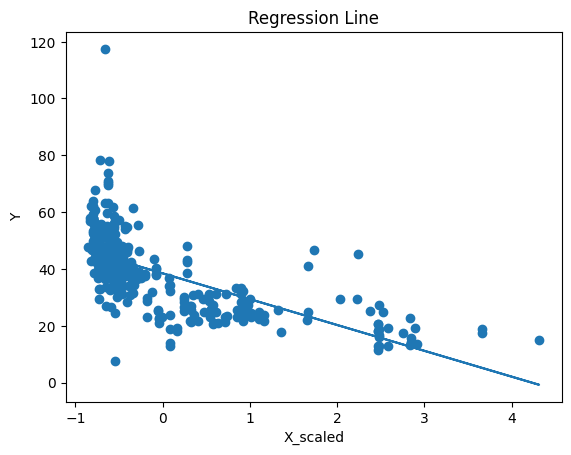

In [10]:
y_pred=theta[0]+theta[1]*Xs_train
plt.title("Regression Line")
plt.xlabel("X_scaled")
plt.ylabel("Y")
plt.scatter(Xs_train,Y_train)
#plt.ylim(20,100)
plt.plot(Xs_train,y_pred)
plt.show()

/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/1908624331.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[k,l]=mse


[[9823.79371149 9645.90387782 9471.46267184 ... 8625.29037485
  8781.91742721 8941.99310726]
 [9625.0154708  9447.12563713 9272.68443114 ... 8426.51213416
  8583.13918652 8743.21486657]
 [9430.23682198 9252.34698831 9077.90578233 ... 8231.73348534
  8388.3605377  8548.43621775]
 ...
 [9164.40415006 8986.51431639 8812.07311041 ... 7965.90081342
  8122.52786578 8282.60354583]
 [9353.58632157 9175.6964879  9001.25528192 ... 8155.08298493
  8311.71003729 8471.78571734]
 [9546.76808496 9368.87825129 9194.43704531 ... 8348.26474832
  8504.89180068 8664.96748073]]


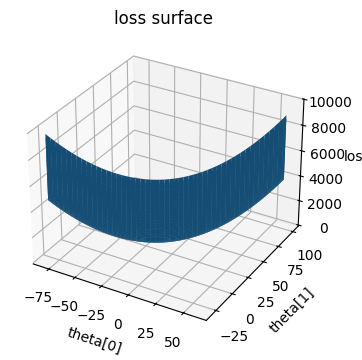

In [11]:
from mpl_toolkits.mplot3d import Axes3D
#w:slope
#b:intercept
wrange=np.linspace(-80,60,100)
brange=np.linspace(-30,100,100)
loss=np.zeros((100,100))
#W,B=np.meshgrid(wrange,brange)#Mesh grid for plotting
l=0
k=0
for w in wrange:
    l=0
    for b in brange:
        mse=0
        tl=len(Xs_train)
        for j in range(0,tl):
            y=b+w*Xs_train[j]
            mse=mse+(Y_train[j]-y)**2
        mse=mse/tl
        loss[k,l]=mse
        l=l+1
    k=k+1
print(loss)
fig=plt.figure(figsize=(6,4))
ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(wrange,brange,loss)
ax.set_xlabel("theta[0]")
ax.set_ylabel("theta[1]")
ax.set_zlabel("loss")
ax.set_title("loss surface")
plt.show()
        


/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/4039031195.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  az[i]=mse
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/4039031195.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0]=theta[0]+lr*e
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/4039031195.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1]=theta[1]+lr*ue


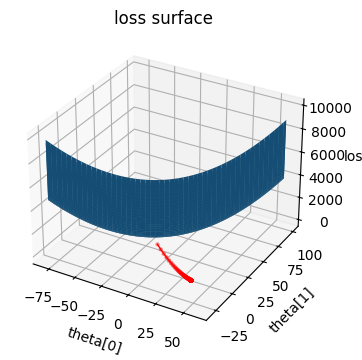

In [12]:
#Track loss plot for gradient descent
ax=np.zeros(n_iter)
ay=np.zeros(n_iter)
az=np.zeros(n_iter)
theta=np.array([1.2,1.1])
n_iter=100
lr=0.1
for i in range(n_iter):
    mse=0
    e=0
    ue=0
    tl=len(Xs_train)
    for j in range(0,tl):
        y=theta[0]+theta[1]*Xs_train[j]
        e=e+Y_train[j]-y
        ue=ue+(Y_train[j]-y)*Xs_train[j]
        mse=mse+(Y_train[j]-y)**2
    e=e/tl
    ue=ue/tl
    mse=mse/tl
    ax[i]=theta[0]
    ay[i]=theta[1]
    az[i]=mse
    theta[0]=theta[0]+lr*e
    theta[1]=theta[1]+lr*ue
fig=plt.figure(figsize=(6,4))
ap=fig.add_subplot(111,projection='3d')
ap.plot_surface(wrange,brange,loss)
ap.scatter(ax,ay,az,color="red",s=5)
ap.plot(ax,ay,az,color="red",linewidth=1)
ap.set_xlabel("theta[0]")
ap.set_ylabel("theta[1]")
ap.set_zlabel("loss")
ap.set_title("loss surface")
plt.show()

/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/1266788007.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  az[i]=e**2
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/1266788007.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[0]=theta[0]+lr*e
/var/folders/_2/fxfjm7hn677ckkvrzttskdw40000gn/T/ipykernel_18733/1266788007.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  theta[1]=theta[1]+lr*e*Xs_train[j]


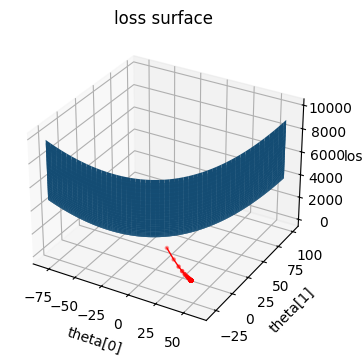

In [13]:
#Track loss plot for stochastic gradient descent
n_iter=100
ax=np.zeros(n_iter)
ay=np.zeros(n_iter)
az=np.zeros(n_iter)
theta=np.array([1.2,1.1])
lr=0.001
for i in range(n_iter):
    mse=0
    for j in range(0,len(Xs_train)):
        y=theta[0]+theta[1]*Xs_train[j]
        e=Y_train[j]-y
        mse=mse+e**2
        ax[i]=theta[0]
        ay[i]=theta[1]
        az[i]=e**2
        theta[0]=theta[0]+lr*e
        theta[1]=theta[1]+lr*e*Xs_train[j]
fig=plt.figure(figsize=(6,4))
ap=fig.add_subplot(111,projection='3d')
ap.plot_surface(wrange,brange,loss)
ap.scatter(ax,ay,az,color="red",s=5)
ap.plot(ax,ay,az,color="red",linewidth=1)
ap.set_xlabel("theta[0]")
ap.set_ylabel("theta[1]")
ap.set_zlabel("loss")
ap.set_title("loss surface")
plt.show()
        